In [1]:
import pandas as pd

import matplotlib.pyplot as plt
from matplotlib.figure import Figure
from matplotlib.backends.backend_tkagg import (FigureCanvasTkAgg, NavigationToolbar2Tk)

import matplotlib.animation as animation
from matplotlib import style
import numpy as np

from sklearn.datasets import make_blobs
from sklearn.cluster import KMeans

from sklearn.pipeline import make_pipeline
from sklearn.preprocessing import Normalizer
from sklearn.cluster import KMeans

import seaborn as sns
pd.options.mode.chained_assignment = None  # default='warn'
from datetime import datetime
import tkinter as tk
from tkinter import ttk
from pandastable import Table, TableModel

In [2]:
df = pd.read_csv("prices.csv")
df.info()

<class 'pandas.core.frame.DataFrame'>
RangeIndex: 851264 entries, 0 to 851263
Data columns (total 7 columns):
 #   Column  Non-Null Count   Dtype  
---  ------  --------------   -----  
 0   date    851264 non-null  object 
 1   symbol  851264 non-null  object 
 2   open    851264 non-null  float64
 3   close   851264 non-null  float64
 4   low     851264 non-null  float64
 5   high    851264 non-null  float64
 6   volume  851264 non-null  float64
dtypes: float64(5), object(2)
memory usage: 45.5+ MB


In [3]:
securities = pd.read_csv("securities.csv")
securities.head()

,Ticker symbol,Security,SEC filings,GICS Sector,GICS Sub Industry,Address of Headquarters,Date first added,CIK
0,MMM,3M Company,reports,Industrials,Industrial Conglomerates,"St. Paul, Minnesota",NaN,66740
1,ABT,Abbott Laboratories,reports,Health Care,Health Care Equipment,"North Chicago, Illinois",1964-03-31,1800
2,ABBV,AbbVie,reports,Health Care,Pharmaceuticals,"North Chicago, Illinois",2012-12-31,1551152
3,ACN,Accenture plc,reports,Information Technology,IT Consulting & Other Services,"Dublin, Ireland",2011-07-06,1467373
4,ATVI,Activision Blizzard,reports,Information Technology,Home Entertainment Software,"Santa Monica, California",2015-08-31,718877


In [4]:
sector = dict(zip(securities['Ticker symbol'], securities['GICS Sector']))

In [5]:
company = dict(zip(securities['Ticker symbol'], securities['Security']))

In [6]:
df['sector'] = df['symbol'].map(sector)
df['name'] = df['symbol'].map(company)
df.head()

,date,symbol,open,close,low,high,volume,sector,name
0,2016-01-05 00:00:00,WLTW,123.430000,125.839996,122.309998,126.250000,2163600.0,Financials,Willis Towers Watson
1,2016-01-06 00:00:00,WLTW,125.239998,119.980003,119.940002,125.540001,2386400.0,Financials,Willis Towers Watson
2,2016-01-07 00:00:00,WLTW,116.379997,114.949997,114.930000,119.739998,2489500.0,Financials,Willis Towers Watson
3,2016-01-08 00:00:00,WLTW,115.480003,116.620003,113.500000,117.440002,2006300.0,Financials,Willis Towers Watson
4,2016-01-11 00:00:00,WLTW,117.010002,114.970001,114.089996,117.330002,1408600.0,Financials,Willis Towers Watson


In [7]:
IT_df = df.loc[df['sector'] == "Information Technology"]
IT_df.head()

,date,symbol,open,close,low,high,volume,sector,name
254,2010-01-04,AAPL,213.429998,214.009998,212.380001,214.499996,123432400.0,Information Technology,Apple Inc.
257,2010-01-04,ACN,41.520000,42.070000,41.500000,42.200001,3650100.0,Information Technology,Accenture plc
258,2010-01-04,ADBE,36.650002,37.090000,36.650002,37.299999,4710200.0,Information Technology,Adobe Systems Inc
259,2010-01-04,ADI,31.790001,31.670000,31.610001,32.189999,2102700.0,Information Technology,"Analog Devices, Inc."
261,2010-01-04,ADP,43.540000,42.830002,42.700002,43.540000,3930100.0,Information Technology,Automatic Data Processing


In [8]:
copy_IT_df = IT_df.drop(['symbol', 'open','close','low','high','volume', 'sector'], axis = 1)
print(copy_IT_df)

              date                       name
254     2010-01-04                 Apple Inc.
257     2010-01-04              Accenture plc
258     2010-01-04          Adobe Systems Inc
259     2010-01-04       Analog Devices, Inc.
261     2010-01-04  Automatic Data Processing
...            ...                        ...
851236  2016-12-30            Western Digital
851245  2016-12-30           Western Union Co
851252  2016-12-30                 Xilinx Inc
851255  2016-12-30                Xerox Corp.
851257  2016-12-30                 Yahoo Inc.

[113484 rows x 2 columns]


In [9]:
stock_open = np.array(IT_df['open']).T 
stock_close = np.array(IT_df['close']).T
movements = stock_close - stock_open
movements.shape

(113484,)

In [10]:
IT_df["movement"] = movements
IT_df

,date,symbol,open,close,low,high,volume,sector,name,movement
254,2010-01-04,AAPL,213.429998,214.009998,212.380001,214.499996,123432400.0,Information Technology,Apple Inc.,0.580000
257,2010-01-04,ACN,41.520000,42.070000,41.500000,42.200001,3650100.0,Information Technology,Accenture plc,0.550000
258,2010-01-04,ADBE,36.650002,37.090000,36.650002,37.299999,4710200.0,Information Technology,Adobe Systems Inc,0.439998
259,2010-01-04,ADI,31.790001,31.670000,31.610001,32.189999,2102700.0,Information Technology,"Analog Devices, Inc.",-0.120001
261,2010-01-04,ADP,43.540000,42.830002,42.700002,43.540000,3930100.0,Information Technology,Automatic Data Processing,-0.709998
...,...,...,...,...,...,...,...,...,...,...
851236,2016-12-30,WDC,68.550003,67.949997,67.610001,69.400002,2824100.0,Information Technology,Western Digital,-0.600006
851245,2016-12-30,WU,21.840000,21.719999,21.600000,21.900000,2538900.0,Information Technology,Western Union Co,-0.120001
851252,2016-12-30,XLNX,61.090000,60.369999,60.020000,61.480000,2111700.0,Information Technology,Xilinx Inc,-0.720001
851255,2016-12-30,XRX,8.720000,8.730000,8.700000,8.800000,11250400.0,Information Technology,Xerox Corp.,0.010000


In [11]:
IT_df_clean = IT_df.pivot_table(index='name',columns ='date',values ='movement', fill_value=0)
IT_df_clean


date,2010-01-04,2010-01-05,2010-01-06,2010-01-07,2010-01-08,2010-01-11,2010-01-12,2010-01-13,2010-01-14,2010-01-15,...,2016-12-16,2016-12-19,2016-12-20,2016-12-21,2016-12-22,2016-12-23,2016-12-27,2016-12-28,2016-12-29,2016-12-30
name,,,,,,,,,,,,,,,,,,,,,
Accenture plc,0.550000,0.230004,0.689999,0.240002,0.060002,0.090000,0.049999,0.290001,0.399998,-0.149998,...,-1.580002,0.419999,0.059997,-0.650001,-0.269997,0.080001,0.190002,-1.389999,0.029999,-0.430001
Activision Blizzard,0.070000,0.080000,0.000000,-0.110000,-0.070000,-0.020000,0.070000,0.010000,0.070000,-0.130000,...,-0.579998,0.299999,0.160004,-0.019996,-0.460003,0.060001,-0.020000,-0.230000,-0.020000,-0.419998
Adobe Systems Inc,0.439998,0.660000,0.289997,-0.520001,-0.060001,-0.470001,-0.479999,0.449997,-0.229999,-0.049999,...,-4.250000,1.720001,0.269997,-0.229996,-0.400002,0.409996,-0.019997,-1.060005,0.050003,-1.120003
Akamai Technologies Inc,0.290001,0.740000,-0.230002,-0.170000,0.039999,-0.140002,0.030001,-0.160000,0.839998,-0.299999,...,-0.729996,0.420006,0.879997,-0.979995,-0.790001,0.319999,0.459999,-0.860000,-0.099998,-0.570000
Alliance Data Systems,0.889999,0.209999,0.349998,0.650001,-0.540001,-0.099998,-0.529999,-0.089996,0.220001,-1.050003,...,-2.660003,2.000000,-1.029999,1.509995,-2.889999,1.639999,0.280014,-5.429993,-0.429993,-1.330002
...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...
Western Union Co,-0.010000,-0.140000,0.110001,0.690001,0.199999,0.010000,-0.020001,0.209999,-0.200001,-0.410000,...,-0.190001,0.220001,-0.049999,0.039999,0.090000,0.080000,0.120001,-0.489999,0.030001,-0.120001
Xerox Corp.,0.090000,0.010000,-0.080000,0.070000,-0.010000,0.160000,0.170000,0.070000,-0.020000,-0.010000,...,0.090000,-0.010000,0.060000,0.020000,-0.070000,-0.040000,-0.010000,-0.170000,-0.070000,0.010000
Xilinx Inc,0.039999,-0.270001,-0.110001,-0.220002,0.459999,-0.270000,-0.310002,0.100000,0.140002,-0.600001,...,-1.840000,0.000000,1.279999,0.280003,-0.550003,0.180000,0.170002,-1.509998,0.140004,-0.720001


In [12]:
#Create a movement price and a company series
mov = IT_df_clean.values
com = IT_df_clean.index.values

#Checking for nulls and infinite values
print(np.any(np.isnan(IT_df_clean)))
print(np.all(np.isfinite(IT_df_clean)))

False
True


    labels             company
19       0        Corning Inc.
64       0         Xerox Corp.
16       0       Cisco Systems
49       0       QUALCOMM Inc.
7        0       Amphenol Corp
..     ...                 ...
67       8           eBay Inc.
53       9  Seagate Technology
45       9  Nvidia Corporation
31       9         Intel Corp.
62       9     Western Digital

[68 rows x 2 columns]


<Figure size 432x288 with 0 Axes>

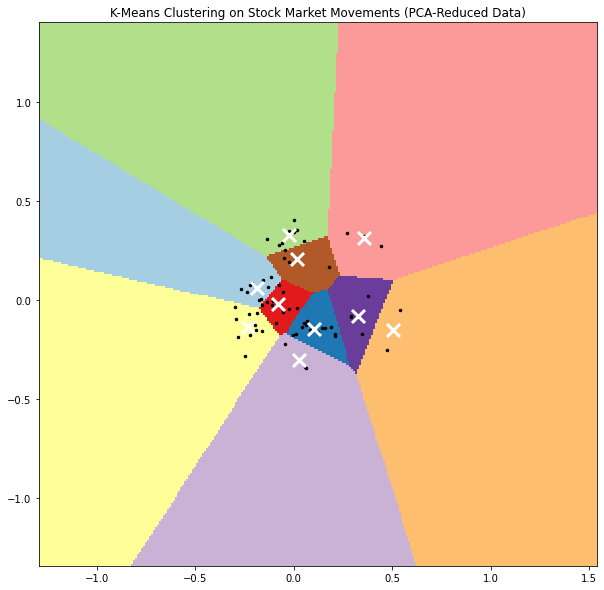

In [13]:
# K-Means and Reduced PCA - Descriptive machine learning methods
from sklearn.decomposition import PCA 

# Create a normalizer: normalizer
normalizer = Normalizer()

# Create a KMeans model with 10 clusters: kmeans
kmeans = KMeans(n_clusters=10)

# Make a pipeline chaining normalizer and kmeans: pipeline
pipeline = make_pipeline(normalizer, kmeans)

# Fit pipeline to the daily price movements
pipeline.fit(mov)

labels = pipeline.predict(mov)
# fit pipeline to daily stock movements
pipeline.fit(mov)

new = normalizer.fit_transform(mov)

# visualize the results
reduced_data = PCA(n_components = 2).fit_transform(new)

# run kmeans on reduced data
kmeans = KMeans(n_clusters=10)
kmeans.fit(reduced_data)
labels = kmeans.predict(reduced_data)

# create DataFrame aligning labels & companies
df = pd.DataFrame({'labels': labels, 'company': com})

# Display df sorted by cluster labels
print(df.sort_values('labels'))


# Define step size of mesh
h = 0.01

# plot the decision boundary
x_min, x_max = reduced_data[:, 0].min() - 1, reduced_data[:,0].max() + 1
y_min, y_max = reduced_data[:, 1].min() - 1, reduced_data[:,1].max() + 1
xx, yy = np.meshgrid(np.arange(x_min, x_max, h), np.arange(y_min, y_max, h))

# Obtain abels for each point in the mesh using our trained model
Z = kmeans.predict(np.c_[xx.ravel(), yy.ravel()])

# Put the result into a color plot
Z = Z.reshape(xx.shape)

# define colorplot
cmap = plt.cm.Paired

# plot figure
plt.clf()
plt.figure(figsize=(10,10))
plt.imshow(Z, interpolation='nearest',
 extent = (xx.min(), xx.max(), yy.min(), yy.max()),
 cmap = cmap,
 aspect = 'auto', origin='lower')
plt.plot(reduced_data[:, 0], reduced_data[:, 1], 'k.', markersize=5)


# plot the centroid of each cluster as a white X
centroids = kmeans.cluster_centers_
plt.scatter(centroids[:, 0], centroids[:, 1],
 marker='x', s=169, linewidth=3,
 color='w', zorder=10)

plt.title('K-Means Clustering on Stock Market Movements (PCA-Reduced Data)')
plt.xlim(x_min, x_max)
plt.ylim(y_min, y_max)
plt.show()

In [14]:
filtered_df = IT_df.drop(["low",'high','volume','sector','name','movement'], axis=1)
filtered_df

,date,symbol,open,close
254,2010-01-04,AAPL,213.429998,214.009998
257,2010-01-04,ACN,41.520000,42.070000
258,2010-01-04,ADBE,36.650002,37.090000
259,2010-01-04,ADI,31.790001,31.670000
261,2010-01-04,ADP,43.540000,42.830002
...,...,...,...,...
851236,2016-12-30,WDC,68.550003,67.949997
851245,2016-12-30,WU,21.840000,21.719999
851252,2016-12-30,XLNX,61.090000,60.369999
851255,2016-12-30,XRX,8.720000,8.730000


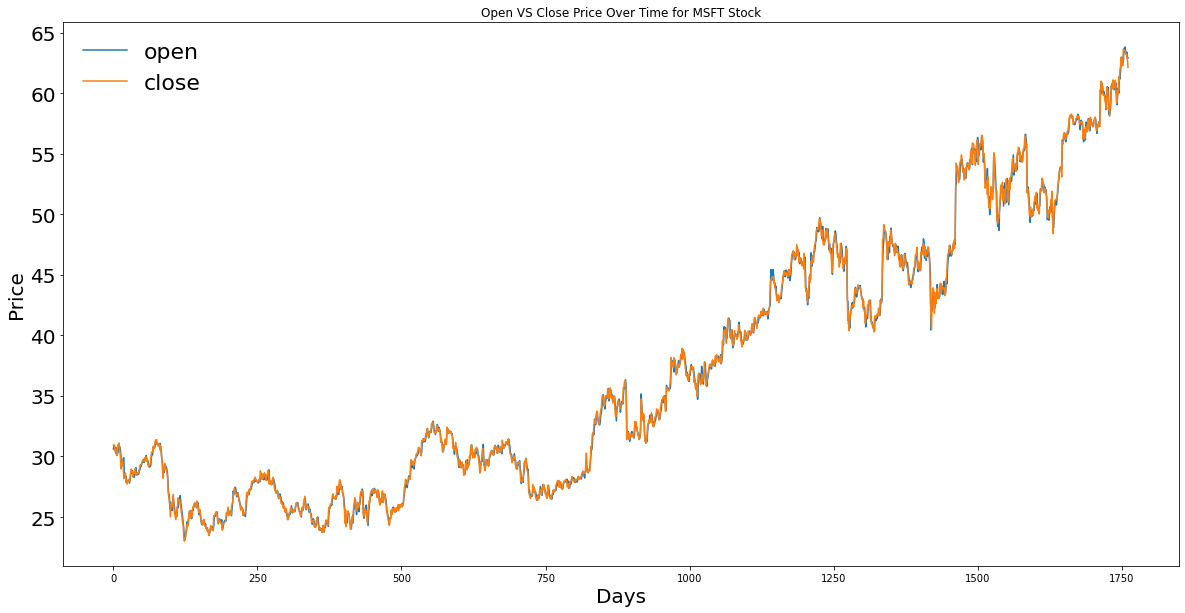

In [15]:
    search_result = filtered_df.loc[filtered_df['symbol']=="MSFT"]
    search_result.reset_index(drop=True, inplace=True)
    plt.figure(figsize = (20,10))
    plt.xticks(fontsize = 10)
    plt.yticks(fontsize = 20)
    plt.xlabel('Days',fontsize = 20)
    plt.ylabel('Price',fontsize = 20)
    plt.plot(search_result['open'],label = 'open') 
    plt.plot(search_result['close'],label = 'close') 
    plt.title('Open VS Close Price Over Time for MSFT Stock')
    plt.legend(loc='upper left', frameon=False,framealpha=1,prop={'size': 22}) 

In [16]:
filtered_df = IT_df.drop(["low",'high','volume','sector','name','movement'], axis=1)
filtered_df

,date,symbol,open,close
254,2010-01-04,AAPL,213.429998,214.009998
257,2010-01-04,ACN,41.520000,42.070000
258,2010-01-04,ADBE,36.650002,37.090000
259,2010-01-04,ADI,31.790001,31.670000
261,2010-01-04,ADP,43.540000,42.830002
...,...,...,...,...
851236,2016-12-30,WDC,68.550003,67.949997
851245,2016-12-30,WU,21.840000,21.719999
851252,2016-12-30,XLNX,61.090000,60.369999
851255,2016-12-30,XRX,8.720000,8.730000


In [17]:
MSFTDF = filtered_df.loc[filtered_df['symbol']=="MSFT"]

In [18]:
import datetime
LR_MSFT = MSFTDF.drop(['symbol'], axis = 1)
LR_MSFT.reset_index(drop=True, inplace=True)
LR_MSFT.index += 1
LR_MSFT.head()

,date,open,close
1,2010-01-04,30.620001,30.950001
2,2010-01-05,30.850000,30.959999
3,2010-01-06,30.879999,30.770000
4,2010-01-07,30.629999,30.450001
5,2010-01-08,30.280001,30.660000


In [19]:
# using Linear Regression for stock prediction

from sklearn.model_selection import train_test_split
from sklearn.linear_model import LinearRegression 

train, test = train_test_split(LR_MSFT, test_size = 0.20)
X_train = np.array(train.index).reshape(-1,1)
y_train = train['close']

In [20]:
maxval = np.max(X_train)
print(maxval)

1762


In [21]:
model = LinearRegression()
model.fit(X_train, y_train)
print('Slope: ', np.ndarray.item(np.squeeze(model.coef_)))
print('Intercept: ', model.intercept_)

Slope:  0.01971592030737639
Intercept:  19.68809957347079


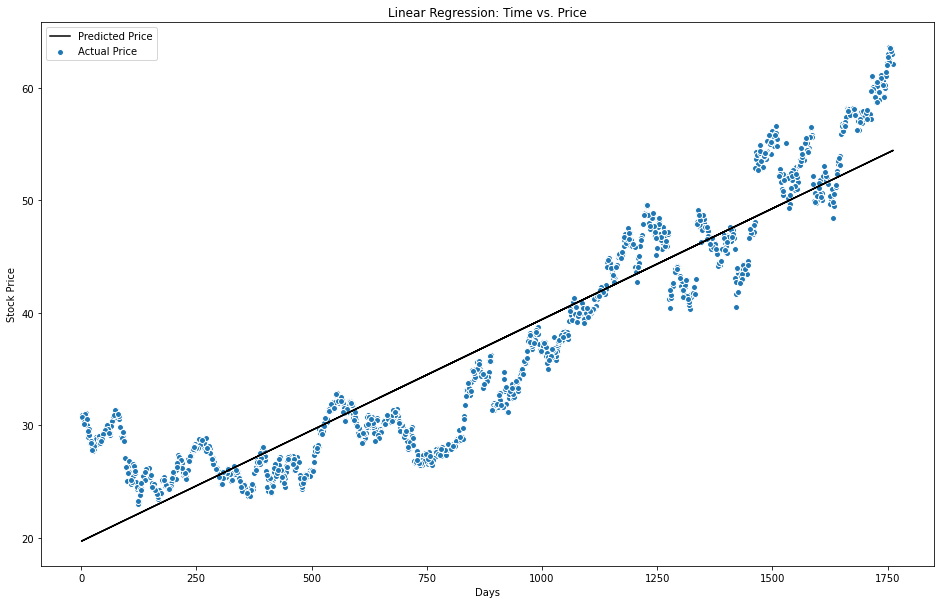

In [22]:
plt.figure(1, figsize=(16,10))
plt.title('Linear Regression: Time vs. Price')
plt.scatter(X_train, y_train, edgecolor='w', label='Actual Price')
plt.plot(X_train, model.predict(X_train), color='k', label='Predicted Price')
plt.xlabel('Days')
plt.ylabel('Stock Price')
plt.legend()
plt.show()

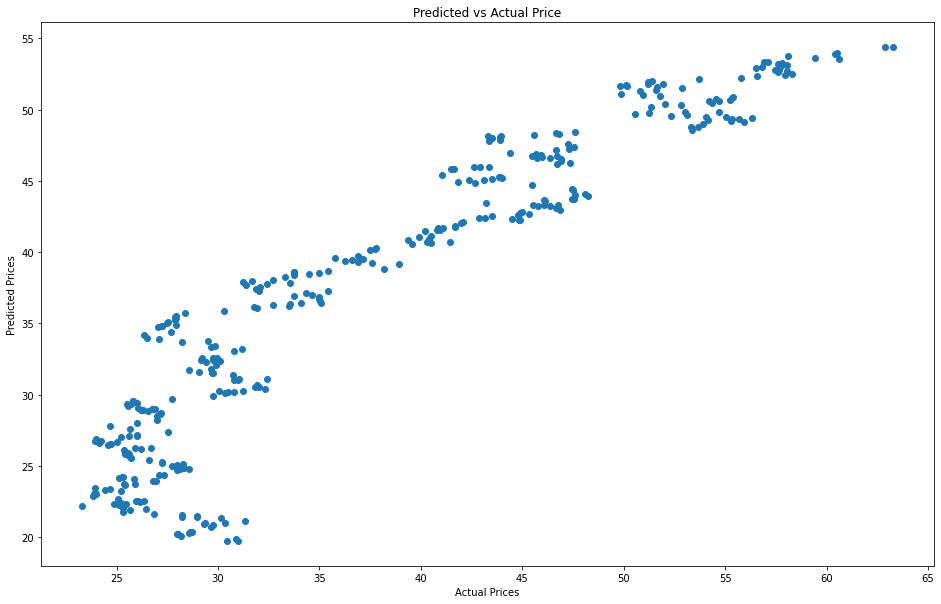

In [23]:
X_test = np.array(test.index).reshape(-1, 1)
y_test = test['close']
y_pred = model.predict(X_test)
plt.figure(1, figsize=(16,10))
plt.scatter(y_test, y_pred)
plt.xlabel('Actual Prices')
plt.ylabel('Predicted Prices')
plt.title('Predicted vs Actual Price')
plt.show()

In [24]:
LR_MSFT['Prediction'] = model.predict(np.array(LR_MSFT.index).reshape(-1, 1))
LR_MSFT.head()

,date,open,close,Prediction
1,2010-01-04,30.620001,30.950001,19.707815
2,2010-01-05,30.850000,30.959999,19.727531
3,2010-01-06,30.879999,30.770000,19.747247
4,2010-01-07,30.629999,30.450001,19.766963
5,2010-01-08,30.280001,30.660000,19.786679


In [25]:
from sklearn import metrics
print('Mean Absolute Error:', metrics.mean_absolute_error(y_test, y_pred))  
print('Mean Squared Error:', metrics.mean_squared_error(y_test, y_pred))  
print('Root Mean Squared Error:', np.sqrt(metrics.mean_squared_error(y_test, y_pred)))
print('R2: ', metrics.r2_score(y_test, y_pred))

Mean Absolute Error: 3.1291457200813153
Mean Squared Error: 15.390258975798112
Root Mean Squared Error: 3.9230420563381823
R2:  0.8722816380730808
